# Art Attack

# Importaciones

In [2]:
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import metnum
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Gráficos

## Gráficos experimento 3

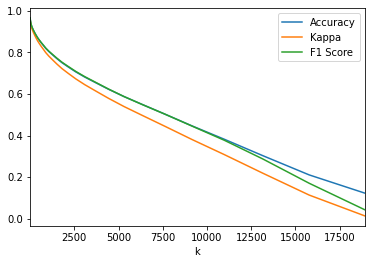

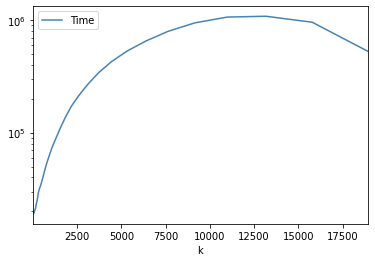

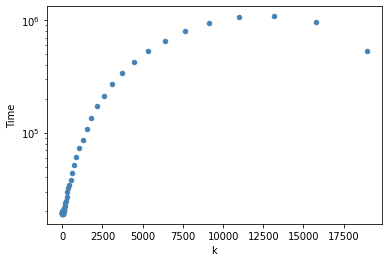

In [104]:
colsQ = ["k", "Accuracy", "Kappa", "F1 Score"]
xS = ["k","k","k","k"]
colsT = ["k", "Time"]

data = pd.read_csv("results/exp3/data.csv")

dataQ = data[colsQ]
dataT = data[colsT]

dataQ.plot(x="k", y=colsQ[1:])

dataT.plot(x='k', y='Time',  color="steelblue").set_yscale("log")
dataT.plot(kind="scatter", x='k', y='Time',  color="steelblue").set_yscale("log")

## Gráficos experimento 1

In [28]:
cols = ["Fold", "Alpha", "k", "Accuracy", "Time", "Kappa", "F1 Score"]

dataPCA = pd.read_csv("results/exp1/PCA.csv")
dataPCA = dataPCA.astype({"Fold": int, "Alpha": int, "k": int})
dataPCA["Time"] = dataPCA["Time"].div(1000)

dataNoPCA = pd.read_csv("results/exp1/noPCA.csv")
dataNoPCA = dataNoPCA.astype({"Fold": int, "k": int})
dataNoPCA["Time"] = dataNoPCA["Time"].div(1000)

dataNoPCA5 = dataNoPCA.loc[dataNoPCA['Fold'] == 5]

dataPCA2 = dataPCA.loc[dataPCA['Fold'] == 2]
dataPCA5 = dataPCA.loc[dataPCA['Fold'] == 5]

dataPCA2 = dataPCA2.loc[dataPCA2["Alpha"]>5]
dataPCA5 = dataPCA5.loc[dataPCA5["Alpha"]>5]

dataPCA2["Rel"] = dataPCA2["Accuracy"]/dataPCA["Time"] 
maximum = dataPCA2['Rel'].max()
dataPCA2["Rel"] = dataPCA2["Rel"]/maximum

dataPCA5["Rel"] = dataPCA5["Accuracy"]/dataPCA["Time"] 
maximum = dataPCA5['Rel'].max()
dataPCA5["Rel"] = dataPCA5["Rel"]/maximum

dataBestPCA = dataPCA5.loc[dataPCA5["Alpha"] == 40]
print(dataNoPCA5)
print(dataBestPCA)

    Unnamed: 0  Fold   k  Accuracy        Time     Kappa    Recall  F1 Score
11           0     5   1  0.966167  136.545302  0.962391  0.966167  0.966124
12           1     5   5  0.965786  136.507021  0.961966  0.965786  0.965707
13           2     5  10  0.962286  135.685534  0.958074  0.962286  0.962207
14           3     5  15  0.959310  135.531615  0.954764  0.959310  0.959233
15           4     5  20  0.956000  136.352866  0.951084  0.956000  0.955924
16           5     5  25  0.953167  135.751688  0.947933  0.953167  0.953085
17           6     5  30  0.950238  134.597987  0.944676  0.950238  0.950154
18           7     5  35  0.948071  135.566649  0.942267  0.948071  0.947993
19           8     5  40  0.945667  136.817141  0.939592  0.945667  0.945595
20           9     5  45  0.943238  137.538379  0.936892  0.943238  0.943160
21          10     5  50  0.942024  136.283500  0.935541  0.942024  0.941955
     Unnamed: 0  Fold  Alpha   k  Accuracy      Time     Kappa    Recall  \


/home/schuster/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/schuster/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/schuster/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Text(0, 0.5, 'Relation Acc/Time')

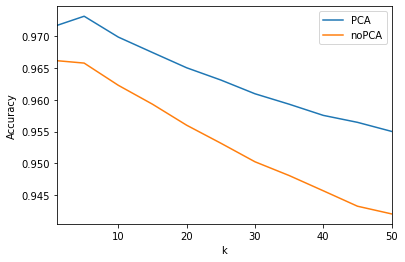

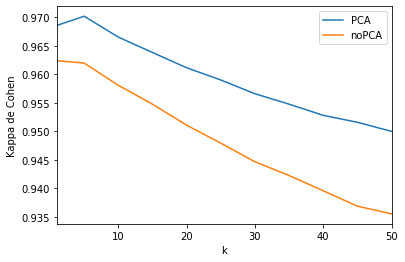

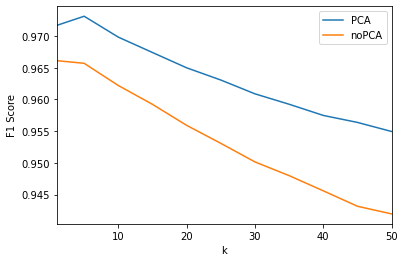

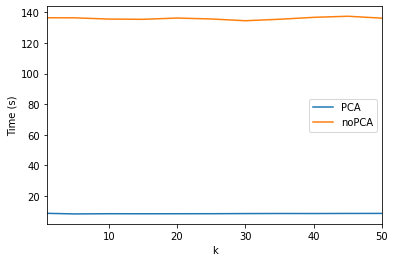

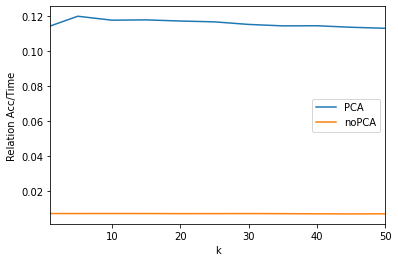

In [29]:
colsQ = ["k", "Accuracy"]
colsK = ["k", "Kappa"]
colsF = ["k", "F1 Score"]
colsT = ["k", "Time"]
colsR = ["k", "Time", "Accuracy"]

dataPQ = dataBestPCA[colsQ]
dataNPQ = dataNoPCA5[colsQ]

dataPK = dataBestPCA[colsK]
dataNPK = dataNoPCA5[colsK]

dataPF = dataBestPCA[colsF]
dataNPF = dataNoPCA5[colsF]

dataPT = dataBestPCA[colsT] 
dataNPT = dataNoPCA5[colsT]

dataPR = dataBestPCA[colsR]
dataNPR = dataNoPCA5[colsR]

# Accuracy

dataPQ["PCA"] = dataPQ["Accuracy"]
dataNPQ["noPCA"] = dataNPQ["Accuracy"]

axQ = dataPQ.plot(x="k", y="PCA", legend=True)
dataNPQ.plot(x="k", y="noPCA", ax=axQ)

axQ.set_ylabel("Accuracy")

# Kappa de Cohen

dataPK["PCA"] = dataPK["Kappa"]
dataNPK["noPCA"] = dataNPK["Kappa"]

axK = dataPK.plot(x="k", y="PCA", legend=True)
dataNPK.plot(x="k", y="noPCA", ax=axK)

axK.set_ylabel("Kappa de Cohen")

# F1 Score

dataPF["PCA"] = dataPF["F1 Score"]
dataNPF["noPCA"] = dataNPF["F1 Score"]

axF = dataPF.plot(x="k", y="PCA", legend=True)
dataNPF.plot(x="k", y="noPCA", ax=axF)

axF.set_ylabel("F1 Score")

# Time

dataPT["PCA"] = dataPT["Time"]
dataNPT["noPCA"] = dataNPT["Time"]

axT = dataPT.plot(x="k", y="PCA", legend=True)
dataNPT.plot(x="k", y="noPCA", ax=axT)

axT.set_ylabel("Time (s)")

# Relation Q/T

dataPR["Rel"] = dataPR["Accuracy"]/dataPR["Time"]
dataNPR["Rel"] = dataNPR["Accuracy"]/dataNPR["Time"]

dataPR["PCA"] = dataPR["Rel"]
dataNPR["noPCA"] = dataNPR["Rel"]

axR = dataPR.plot(x="k", y="PCA", legend=True)
dataNPR.plot(x="k", y="noPCA", ax=axR)

axR.set_ylabel("Relation Acc/Time")

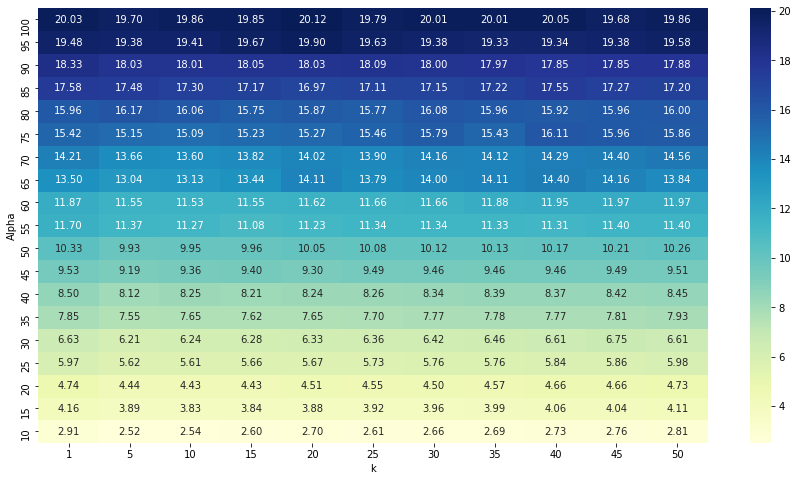

In [39]:
hm5 = dataPCA5
hm5 = hm5.pivot(columns='k', index='Alpha', values='Time')
fig, axs = plt.subplots(1, 1, figsize=(15, 8))
hmap = sns.heatmap(hm5, annot=True, ax=axs, cmap="YlGnBu", fmt=".2f")
hmap.invert_yaxis()

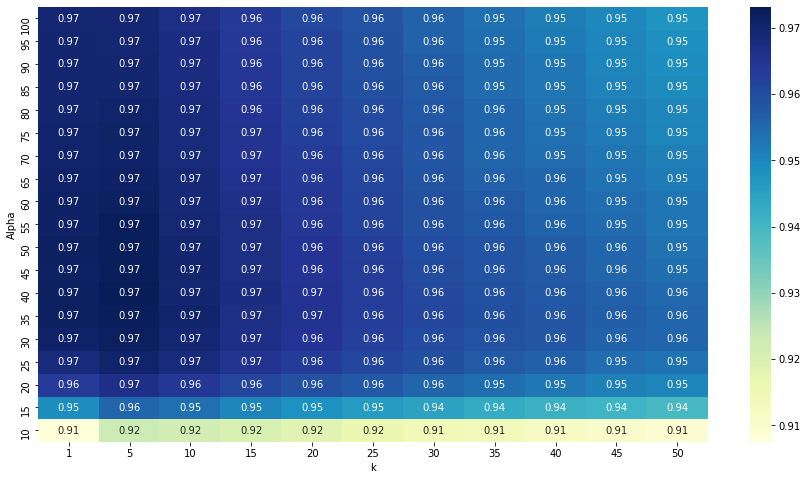

In [40]:
hm5 = dataPCA5
hm5 = hm5.pivot(columns='k', index='Alpha', values='Accuracy')
fig, axs = plt.subplots(1, 1, figsize=(15, 8))
hmap = sns.heatmap(hm5, annot=True, ax=axs, cmap="YlGnBu")
hmap.invert_yaxis()

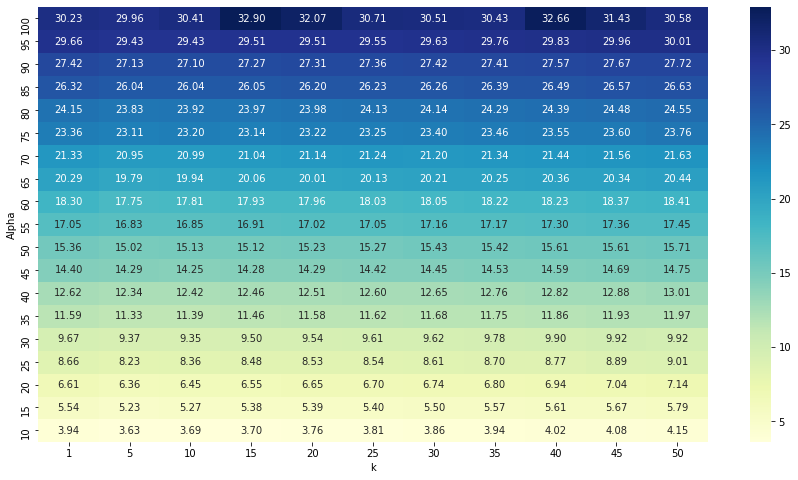

In [41]:
hm2 = dataPCA2
hm2 = hm2.pivot(columns='k', index='Alpha', values='Time')
fig, axs = plt.subplots(1, 1, figsize=(15, 8))
hmap = sns.heatmap(hm2, annot=True, ax=axs, cmap="YlGnBu", fmt=".2f")
hmap.invert_yaxis()

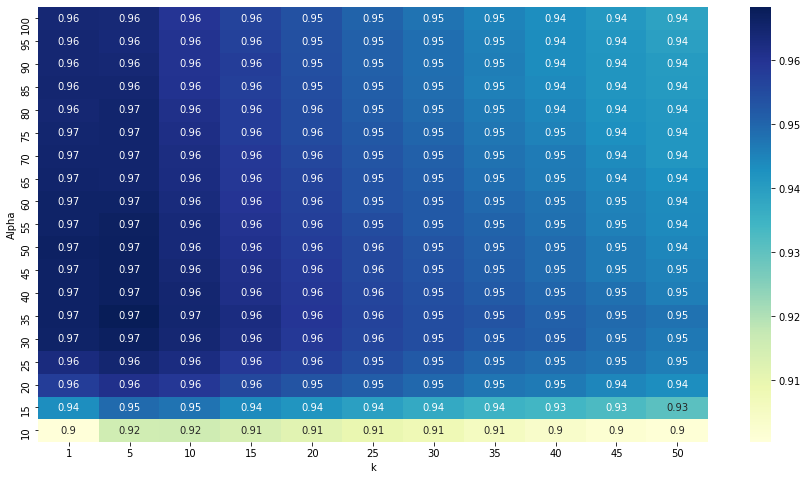

In [42]:
hm2 = dataPCA2
hm2 = hm2.pivot(columns='k', index='Alpha', values='Accuracy')
fig, axs = plt.subplots(1, 1, figsize=(15, 8))
hmap = sns.heatmap(hm2, annot=True, ax=axs, cmap="YlGnBu")
hmap.invert_yaxis()

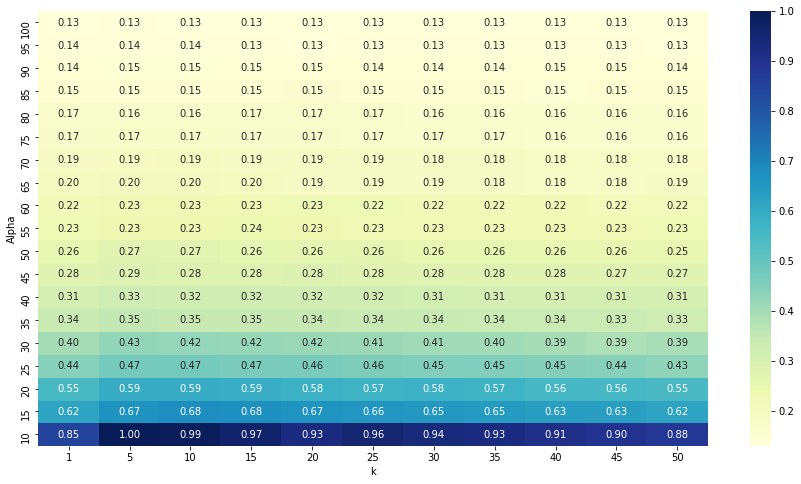

In [43]:
hm5 = dataPCA5
hm5 = hm5.pivot(columns='k', index='Alpha', values='Rel')
fig, axs = plt.subplots(1, 1, figsize=(15, 8))
hmap = sns.heatmap(hm5, annot=True, ax=axs, cmap="YlGnBu", fmt=".2f")
hmap.invert_yaxis()

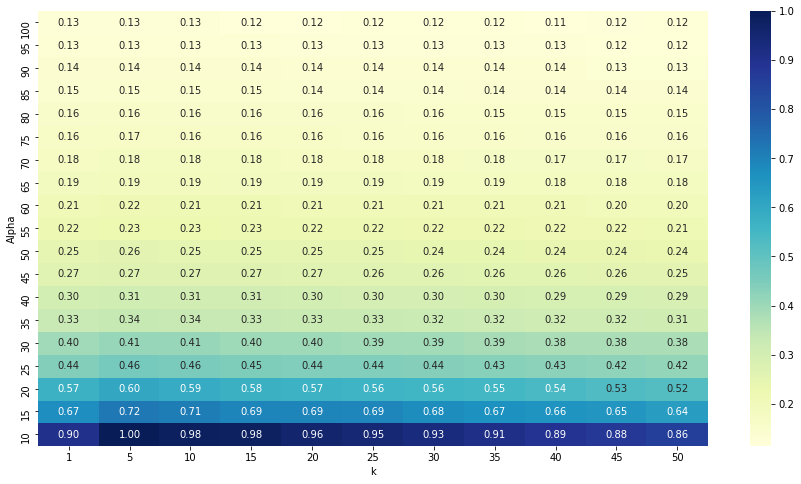

In [44]:
hm2 = dataPCA2
hm2 = hm2.pivot(columns='k', index='Alpha', values='Rel')
fig, axs = plt.subplots(1, 1, figsize=(15, 8))
hmap = sns.heatmap(hm2, annot=True, ax=axs, cmap="YlGnBu", fmt=".2f")
hmap.invert_yaxis()

## Gráficos experimento 2

/home/schuster/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


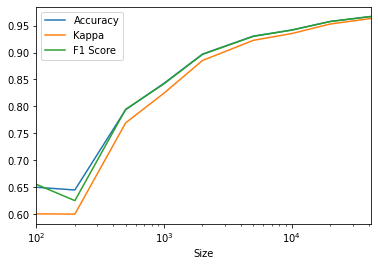

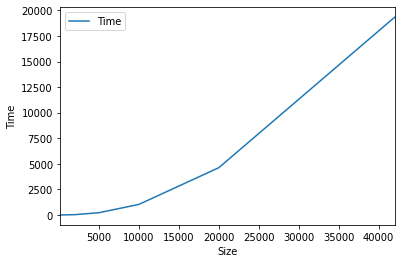

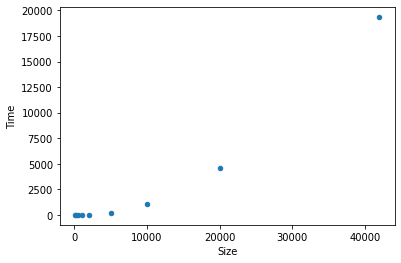

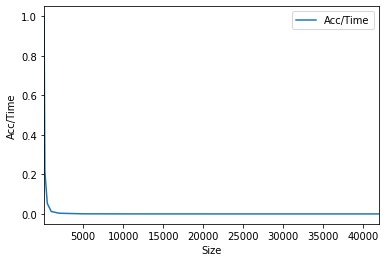

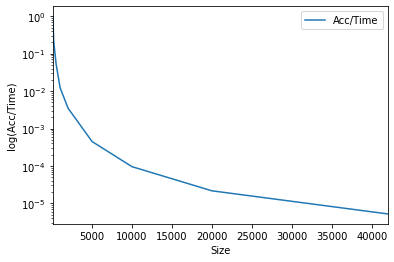

In [74]:
cols =  ['Size','Accuracy','Kappa', 'F1 Score']
values = ['Accuracy','Kappa', 'F1 Score']
colsTime = ['Size','Time']
colsR = ['Size','Accuracy']

df2 = pd.read_csv("results/exp2/data.csv")
df2 = df2.groupby(['Fold', 'Size', 'k']).mean().reset_index()
df2 = df2.loc[list(range(9,18))]

df2Time = df2[colsTime]
df2 = df2[cols]
dfR = df2[colsR]

dfR["Time"] = df2Time["Time"]

dfR["Acc/Time"] = dfR["Accuracy"]/dfR["Time"]
maximum = dfR['Acc/Time'].max()
dfR["Acc/Time"] = dfR["Acc/Time"]/maximum

# Plots

df2.plot(x='Size', y=values).set_xscale("log")

axT = df2Time.plot(x='Size')
axT.set_ylabel("Time")

df2Time.plot(kind = 'scatter', x='Size', y='Time')

axR = dfR.plot(x="Size", y="Acc/Time", legend=True)
axR.set_ylabel("Acc/Time")

axR = dfR.plot(x="Size", y="Acc/Time", legend=True)
axR.set_ylabel("log(Acc/Time)")
axR.set_yscale("log")

### Experimento distancias KNN

In [26]:
dfE = pd.read_csv("results/expDistancias/dataEuclidea.csv")
dfE = dfE.mean().to_frame().T
dfE = dfE[['Time','Accuracy','Kappa', 'F1 Score']]
dfE.insert(0, "Distancia", "Euclidea (Eigen)")


dfM = pd.read_csv("results/expDistancias/dataManhattan.csv")
dfM = dfM[['Time','Accuracy','Kappa', 'F1 Score']]
dfM.insert(0, "Distancia", "Manhattan")

dfC = pd.read_csv("results/expDistancias/dataChebyshev.csv")
dfC = dfC[['Time','Accuracy','Kappa', 'F1 Score']]
dfC.insert(0, "Distancia", "Chebyshev")

dfE2 = pd.read_csv("results/expDistancias/dataEuclidea2.csv")
dfE2 = dfE2[['Time','Accuracy','Kappa', 'F1 Score']]
dfE2.insert(0, "Distancia", "Euclidea")

df = pd.concat([dfE,dfE2,dfM,dfC])
df["Time (s)"] = df["Time"]
df = df[['Distancia','Time (s)','Accuracy','Kappa', 'F1 Score']].round(decimals = 3)
df.to_latex(index=False)
print(df.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
        Distancia &  Time (s) &  Accuracy &  Kappa &  F1 Score \\
\midrule
 Euclidea (Eigen) &     8.843 &     0.973 &  0.970 &     0.973 \\
         Euclidea &    17.605 &     0.973 &  0.970 &     0.973 \\
        Manhattan &    17.005 &     0.971 &  0.968 &     0.971 \\
        Chebyshev &    17.437 &     0.961 &  0.956 &     0.961 \\
\bottomrule
\end{tabular}



### Experimento tamaño Folds

   Fold   Time (s)  Accuracy     Kappa  F1 Score
0     2  27.020702  0.967167  0.963505  0.967111
1     5  16.889653  0.973167  0.970173  0.973130
2    10   9.740402  0.974500  0.971652  0.974472
3    15   7.050609  0.974976  0.972178  0.974951
4    20   5.445591  0.974881  0.972068  0.974856


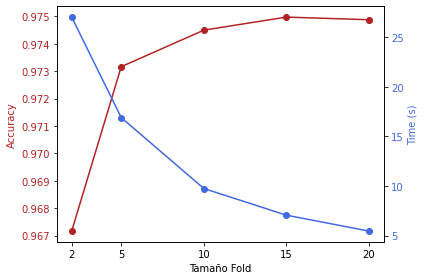

In [75]:
df = pd.read_csv("results/expFold/data.csv")
df = df.astype({'Fold': int})
df["Time (s)"] = df["Time"]
df = df[['Fold','Time (s)','Accuracy','Kappa', 'F1 Score']]
print(df)


data1 = df['Accuracy'].tolist()
data2 = df['Time (s)'].tolist()
xAxis = df['Fold'].tolist()

fig, ax1 = plt.subplots()

color = 'firebrick'
ax1.set_xlabel('Tamaño Fold')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(xAxis, data1, '-ok', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'royalblue'
ax2.set_ylabel('Time (s)', color=color)  # we already handled the x-label with ax1
ax2.plot(xAxis, data2, '-ok', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(xAxis, xAxis)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

